In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from FlappyAgents.abst_flappy_agent import FlappyAgent
from FlappyAgents.qlearning_flappy_agent import QlearningAgent
# from FlappyAgents.new_deepQ_flappy_agent import newDeepQAgent
# from FlappyAgents.david_deepQ_flappy_agent import newDeepQAgent
import playyy

pygame 2.1.2 (SDL 2.0.18, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
#######################################
# RUN THIS TO RESET LEARNING PROGRESS #
#######################################

agent: FlappyAgent = QlearningAgent()
trainedlvl = -1

results = []
trainingsizes = []
qvalues = []
times = []
frames = []

In [3]:

playsize = 25
i = 0
stepsize = 100
for i in range(0, 10000 + 1, stepsize):
	if trainedlvl < i:
		_start = int(time() * 1000)
		# SETUP
		#agent: FlappyAgent = DeepQAgent()

		start = int(time() * 1000)
		_frames = playyy.train(stepsize, agent)
		duration = int(time() * 1000) - start
		# write(agent, filestr)

		#vals = read("results/qvalues_4000")
		#print(filestr)
		#vals = read(filestr)
		#agent.q_values = vals

		#print(len(agent.q_values))
		start2 = int(time() * 1000)
		rundata = playyy.run_game(playsize, agent)
		duration2 = int(time() * 1000) - start2

		
		results.append(rundata)

		
		# for result in results:
		# 	sum = 0
		# 	for v in result:
		# 		sum = sum + v
		# 	result_sums.append(sum)

		# 	mini.append(np.min(result))
		# 	result_q1.append(np.quantile(result, 0.25))
		# 	result_q2.append(np.quantile(result, 0.5))
		# 	result_q3.append(np.quantile(result, 0.75))
		# 	maxi.append(np.max(result))
		frames.append(_frames)
		trainingsizes.append(i)	
		# qvalues.append(len(agent.q_values))
		times.append(duration)
		trainedlvl = i
	
		_duration = int(time() * 1000) - start
		print(i, _duration / 1000, duration / 1000, duration2 / 1000, rundata[0])

0 1.635 1.389 0.246 -5.0
100 1.529 1.282 0.247 -5.0
200 1.536 1.272 0.264 -5.0
300 1.816 1.459 0.357 -5.0
400 1.799 1.461 0.338 -5.0
500 1.832 1.513 0.319 -5.0
600 2.328 1.907 0.421 -2.0
700 2.733 2.285 0.448 -5.0
800 2.476 2.02 0.456 -3.0
900 2.656 2.187 0.469 -2.0
1000 3.036 2.497 0.539 -4.0
1100 3.638 2.766 0.872 -2.0
1200 4.878 3.993 0.885 -2.0
1300 4.185 3.585 0.6 -3.0
1400 4.406 3.757 0.649 0.0
1500 4.553 3.663 0.89 3.0
1600 6.132 4.945 1.187 7.0
1700 6.7 5.516 1.184 9.0
1800 5.999 5.015 0.984 0.0
1900 6.249 5.001 1.248 6.0
2000 8.101 6.966 1.135 -1.0
2100 8.167 6.24 1.927 5.0
2200 9.75 8.058 1.692 6.0
2300 13.406 11.24 2.166 3.0
2400 19.723 12.833 6.89 59.0
2500 29.044 17.707 11.337 81.0
2600 19.748 16.383 3.365 59.0
2700 31.747 21.035 10.712 42.0
2800 37.255 21.389 15.866 273.0
2900 28.091 23.959 4.132 32.0
3000 34.52 20.016 14.504 179.0
3100 29.961 21.977 7.984 44.0
3200 22.893 16.233 6.66 36.0


KeyboardInterrupt: 

In [ ]:
result_sums = []
mean = []

mini = []
result_q1 = []
result_q2 = []
result_q3 = []
maxi = []

# result magic
for result in results:
	result_sums.append(np.sum(result))
	mean.append(np.mean(result))

	mini.append(np.min(result))
	result_q1.append(np.quantile(result, 0.25))
	result_q2.append(np.quantile(result, 0.5))
	result_q3.append(np.quantile(result, 0.75))
	maxi.append(np.max(result))

# frames magic
masterframes = []
s: int = 0
for frame in frames:
	for f in frame:
		s = s + f
	masterframes.append(s)

print(len(result_sums))
print(len(trainingsizes))

framedf = pd.DataFrame({})
framedf

df = pd.DataFrame({'trainingsizes': trainingsizes, "frames": frames, "masterframes": masterframes, "results": results, 'result_sums': result_sums, "mean": mean, "qvalues": qvalues, "times": times, "mini": mini, "result_q1": result_q1, "result_q2": result_q2, "result_q3": result_q3, "maxi": maxi})
df



2
2


ValueError: All arrays must be of the same length

In [4]:
df = pd.read_table("savepoint_matteo2.csv", sep=",", index_col=[0]) 
df

,trainingsizes,frames,masterframes,results,result_sums,mean,qvalues,times,mini,result_q1,result_q2,result_q3,maxi
0,0,"[62, 62, 62, 62, 60, 62, 62, 62, 62, 62, 62, 6...",6098,"[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....",-125.0,-5.00,498,885,-5.0,-5.0,-5.0,-5.0,-5.0
1,100,"[59, 62, 62, 59, 62, 62, 62, 62, 62, 62, 62, 6...",12247,"[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....",-125.0,-5.00,665,707,-5.0,-5.0,-5.0,-5.0,-5.0
2,200,"[62, 62, 62, 62, 62, 62, 65, 62, 62, 67, 62, 6...",18496,"[-4.0, -4.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....",-117.0,-4.68,844,705,-5.0,-5.0,-5.0,-4.0,-4.0
3,300,"[62, 62, 62, 68, 62, 62, 62, 76, 65, 62, 62, 6...",25297,"[-5.0, -3.0, -4.0, -5.0, -4.0, -3.0, -5.0, -5....",-105.0,-4.20,1028,747,-5.0,-5.0,-4.0,-4.0,-1.0
4,400,"[62, 134, 62, 62, 62, 72, 62, 134, 62, 62, 62,...",32106,"[-5.0, -3.0, -5.0, -5.0, -5.0, -5.0, -3.0, -4....",-116.0,-4.64,1188,726,-5.0,-5.0,-5.0,-4.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9600,"[211, 521, 260, 529, 324, 98, 220, 219, 211, 4...",2844878,"[40.0, 85.0, 73.0, 11.0, 4.0, 1.0, 74.0, 81.0,...",1513.0,60.52,5220,5098,1.0,23.0,40.0,84.0,306.0
97,9700,"[109, 401, 291, 62, 137, 1156, 586, 557, 713, ...",2887303,"[511.0, 1080.0, 99.0, 88.0, 538.0, 124.0, 268....",9496.0,379.84,5222,4454,28.0,124.0,274.0,538.0,1409.0
98,9800,"[445, 189, 1208, 288, 76, 822, 62, 247, 211, 1...",2929708,"[56.0, 0.0, 26.0, 103.0, 5.0, 12.0, 15.0, 34.0...",1500.0,60.00,5223,4799,-2.0,15.0,26.0,80.0,287.0
99,9900,"[66, 627, 255, 62, 98, 134, 67, 247, 450, 581,...",2972270,"[1529.0, 126.0, 645.0, 1852.0, 1788.0, 220.0, ...",48769.0,1950.76,5227,4698,126.0,565.0,1788.0,2560.0,7021.0


[Text(0, 0.5, 'Score'),
 Text(0.5, 0, 'Iteration'),
 Text(0.5, 1.0, 'Mean score vs. Number of training iterations')]

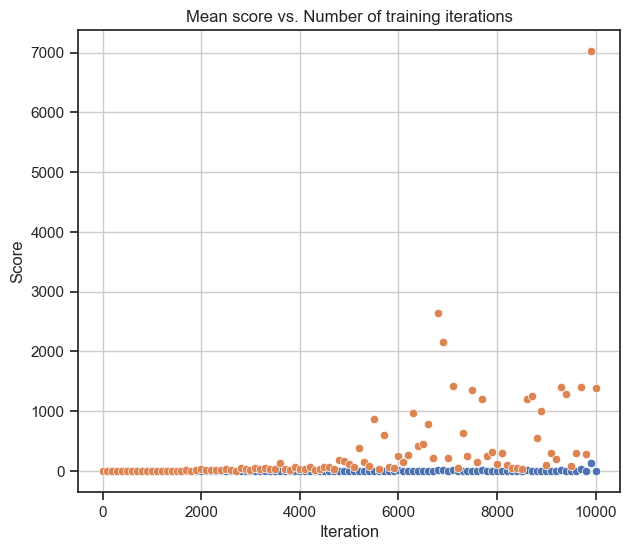

In [5]:
from matplotlib.pyplot import xlabel


# sns.color_palette("tab10")


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

sns.scatterplot(data=df, x="trainingsizes", y="mini", palette="vlag")
# sns.scatterplot(data=df, x="trainingsizes", y="mean", palette="vlag")
sns.scatterplot(data=df, x="trainingsizes", y="maxi", palette="vlag")
ax.set(ylabel="Score", xlabel="Iteration", title="Mean score vs. Number of training iterations")


[Text(0, 0.5, 'Score'),
 Text(0.5, 0, 'Frames'),
 Text(0.5, 1.0, 'Minimum and Maximum score vs. Number of training frames')]

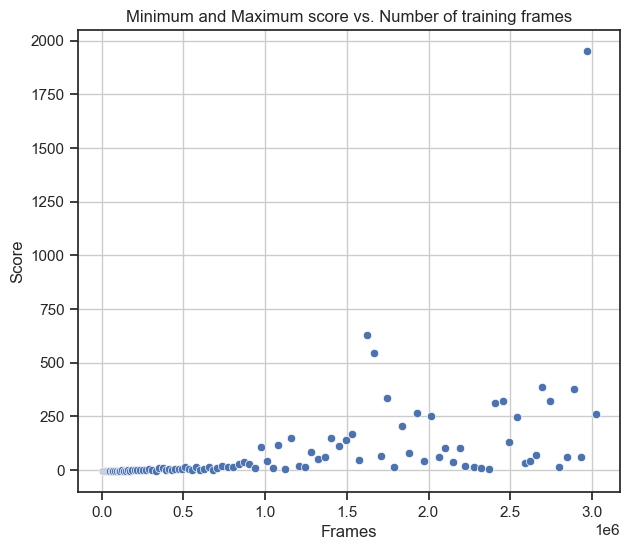

In [6]:


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

sns.scatterplot(data=df, x="masterframes", y="mean", palette="vlag")
ax.set(ylabel="Score", xlabel="Frames", title="Minimum and Maximum score vs. Number of training frames")


[Text(0, 0.5, 'Number of q-values'),
 Text(0.5, 0, 'Iteration'),
 Text(0.5, 1.0, 'Entries of q-values vs. Number of training iterations')]

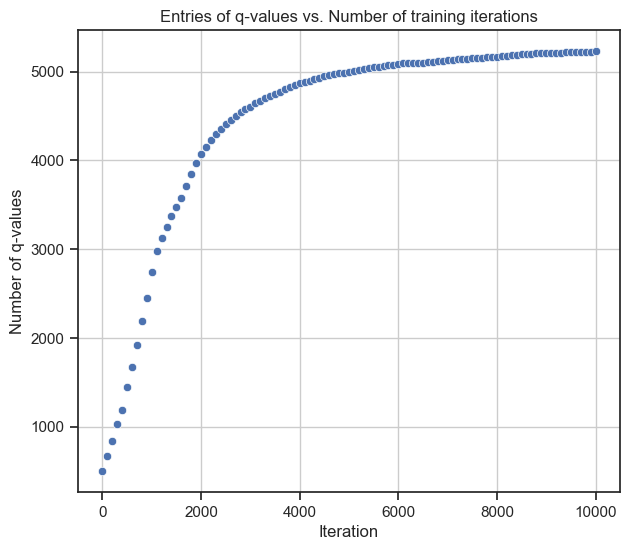

In [7]:


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

sns.scatterplot(data=df, x="trainingsizes", y="qvalues", palette="vlag")
ax.set(ylabel="Number of q-values", xlabel="Iteration", title="Entries of q-values vs. Number of training iterations")


[Text(0, 0.5, 'Number of q-values'),
 Text(0.5, 0, 'Frames'),
 Text(0.5, 1.0, 'Entries of q-values vs. Number of training frames')]

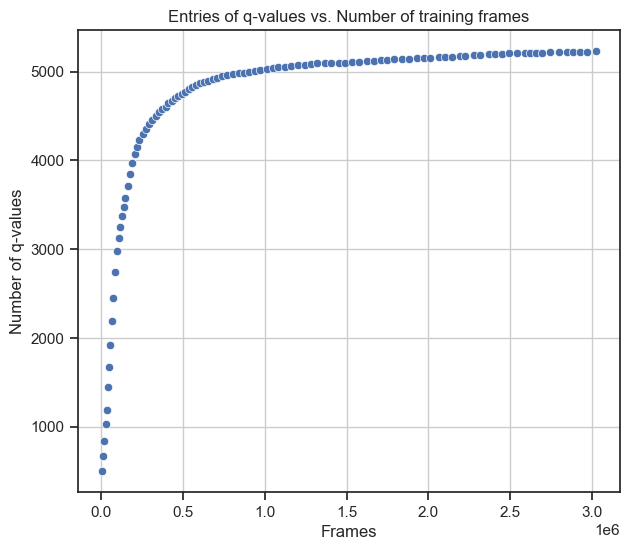

In [8]:

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

sns.scatterplot(data=df, x="masterframes", y="qvalues", palette="vlag")
ax.set(ylabel="Number of q-values", xlabel="Frames", title="Entries of q-values vs. Number of training frames")


[Text(0, 0.5, 'Duration in milliseconds'),
 Text(0.5, 0, 'Iteration'),
 Text(0.5, 1.0, 'Training duration of vs. Number of training iterations')]

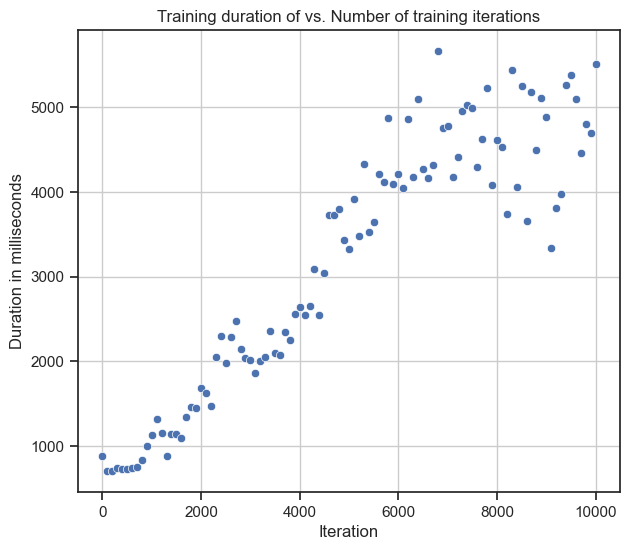

In [9]:


sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

sns.scatterplot(data=df, x="trainingsizes", y="times", palette="vlag")
ax.set(ylabel="Duration in milliseconds", xlabel="Iteration", title="Training duration of vs. Number of training iterations")



In [10]:
# df.to_csv('savepoint.csv') 
# filestr: str = 'results/qvalues_' + str(trainedlvl)
# playyy.write(agent, filestr)

[Text(0, 0.5, 'Score'),
 Text(0.5, 0, 'Iteration'),
 Text(0.5, 1.0, 'Mean score vs. Number of training iterations')]

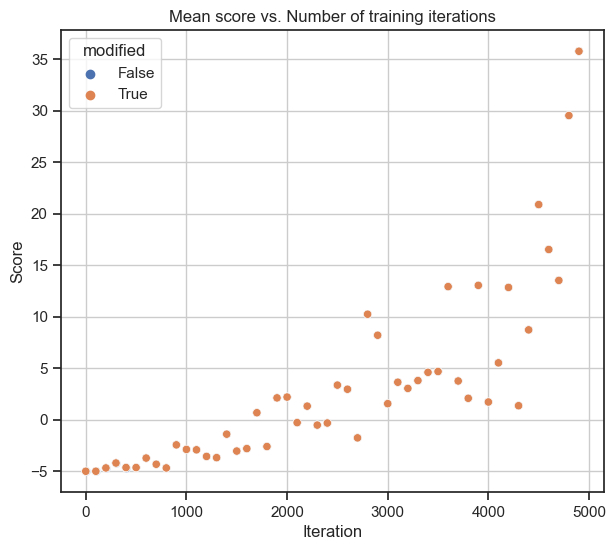

In [14]:
sns.color_palette("tab10")
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# # df1 = pd.read_table("savepoint_matteo_lr05_.csv", sep=",", index_col=[0]) 
df2 = pd.read_table("savepoint_matteo2.csv", sep=",", index_col=[0]).head(n = 50)
# # df3 = pd.read_table("savepoint_matteo_lr2_.csv", sep=",", index_col=[0]) 

# # df1 = pd.read_table("savepoint_matteo_dc08_.csv", sep=",", index_col=[0]) 
# # df2 = pd.read_table("savepoint_matteo2.csv", sep=",", index_col=[0]).head(n = 50)
# # df3 = pd.read_table("savepoint_matteo_dc09.csv", sep=",", index_col=[0]) 

# df1 = pd.read_table("savepoint_matteo_eps02_.csv", sep=",", index_col=[0]) 
# df2 = pd.read_table("savepoint_matteo2.csv", sep=",", index_col=[0]).head(n = 50)
# df3 = pd.read_table("savepoint_matteo_eps005.csv", sep=",", index_col=[0]) 


# set1 = sns.scatterplot(data=df1, x="trainingsizes", y="mean", palette="vlag")
set2 = sns.scatterplot(data=df2.head(), x="trainingsizes", y="mean", palette="vlag")
setq = sns.scatterplot(data=df2.head(), x="trainingsizes", y="mean", palette="vlag")
# set3 = sns.scatterplot(data=df3, x="trainingsizes", y="mean", palette="vlag")
# concatenated = pd.concat([df1.assign(epsilon='0.2'), df2.assign(epsilon='0.1'),  df3.assign(epsilon='0.05')])
concatenated = pd.concat([df.head(n=50).assign(modified='False'), df2.assign(modified='True')])

sns.scatterplot(data=concatenated, x="trainingsizes", y="mean", hue="modified")
ax.set(ylabel="Score", xlabel="Iteration", title="Mean score vs. Number of training iterations")
